<a href="https://colab.research.google.com/github/ruksz/AirbnbEDA/blob/main/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Data Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
Rukshar Shaikh

# **Project Summary -**

# *What is Airbnb?*
Airbnb is more popular among guest and hosts as it offers people an easy, relatively stress-free solution as host can earn decent income by listing the property and guest often find them cheaper and more homier than hotels. 

# *What does this Airbnb dataset conatins and this project all about?*
This Airbnb dataset consists of rental listings of the 5 boroughs of most popular city in US, NYC : Brooklyn, Manhattan, Queens, Staten Island, Bronx. Each row represents a listing with details such as host id, host name, listing name, price per night, number of reviews, latitude & longitude, locality, area, and more.
Different analytics are done to get business insights from it using python libraries. I've tried to find the listings that collect maximum revenue, densed area visulaistion using latitude and longitude, finding busy hosts and those who have maximum listings, reviews on the type of properties, and more.


# **GitHub Link -**

Provide your GitHub Link here.
[https://github.com/ruksz/AirbnbEDA](https://)

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Main business objective for this analysis :
* To find the listings that makes maximum revenue. 
* Finding the most preffered locations by the guests.
* Getting details about hosts (i.e: Most busy host)
* Which type of listings are hot favourite among the guests?
* Which listings gain the maximum reviews?


# ***Let's Begin !***

### Import Libraries

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [7]:
# Load Dataset
filePath ='//content/drive/MyDrive/'
df = pd.read_csv(filePath + 'Airbnb NYC 2019.csv')

airbnb_df=df.copy()

### Dataset First View

In [8]:
# Dataset First Look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
airbnb_df.shape

(48895, 16)

### Dataset Information

In [10]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
len(airbnb_df[airbnb_df.duplicated()])

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print(airbnb_df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Dropping last_review and reviews_per_month column as it contains more than 10052 null values
#airbnb_df.drop(['last_review', 'reviews_per_month'], axis=1)
airbnb_df.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)

## ***2. Understanding Your Variables***

In [86]:
# Dataset Columns
list(airbnb_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'Counts']

In [87]:
# Dataset Describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Counts
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,10.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,9078.500000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,4997.745319
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,32.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,7999.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,11696.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,12720.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,12720.000000


### Check Unique Values for each variable.

In [88]:
# Check Unique Values for each variable.
for i in airbnb_df.columns:
  print("Unique values in ",i,":",airbnb_df[i].nunique())

Unique values in  id : 48895
Unique values in  name : 47905
Unique values in  host_id : 37457
Unique values in  host_name : 11452
Unique values in  neighbourhood_group : 5
Unique values in  neighbourhood : 221
Unique values in  latitude : 19048
Unique values in  longitude : 14718
Unique values in  room_type : 3
Unique values in  price : 674
Unique values in  minimum_nights : 109
Unique values in  number_of_reviews : 394
Unique values in  calculated_host_listings_count : 47
Unique values in  availability_365 : 366
Unique values in  Counts : 5


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
print(airbnb_df['neighbourhood_group'].unique())
# Getting Unique neighbourhood and neighbourhood_groups Count
print("Total", airbnb_df['neighbourhood_group'].nunique(),"unique districts(boroughs), and ", airbnb_df['neighbourhood'].nunique() , "areas." )

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Total 5 unique districts(boroughs), and  221 areas.


In [18]:
#1. Finding the total host_listings for each boroughs and visulaised through bargraph
popular_group= airbnb_df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index().sort_values(by='calculated_host_listings_count', ascending=False).head(5)
print(popular_group)

  neighbourhood_group  calculated_host_listings_count
2           Manhattan                          277073
1            Brooklyn                           45925
3              Queens                           23005
0               Bronx                            2437
4       Staten Island                             865


In [19]:
#2 .Price sorted according to number of reviews of the lisiting and further visulaised as a scatterplot for the business insights
price_area = airbnb_df.groupby(['price'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews', ascending=False)
print(price_area)

     price  number_of_reviews
36      47                629
38      49                607
35      46                543
88      99                540
37      48                510
..     ...                ...
540    830                  0
538    822                  0
531    794                  0
280    292                  0
508    680                  0

[674 rows x 2 columns]


In [20]:
#3. Maximum Price w.r.t room_type for neighbourhood_group
area_wise_max_cost = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index().sort_values(by='room_type')
print(area_wise_max_cost)

   neighbourhood_group        room_type  price
0                Bronx  Entire home/apt   1000
3             Brooklyn  Entire home/apt  10000
6            Manhattan  Entire home/apt  10000
9               Queens  Entire home/apt   2600
12       Staten Island  Entire home/apt   5000
1                Bronx     Private room   2500
4             Brooklyn     Private room   7500
7            Manhattan     Private room   9999
10              Queens     Private room  10000
13       Staten Island     Private room    300
2                Bronx      Shared room    800
5             Brooklyn      Shared room    725
8            Manhattan      Shared room   1000
11              Queens      Shared room   1800
14       Staten Island      Shared room    150


In [21]:
#4. FInding the busy hosts.
busy_hosts = airbnb_df.groupby(['host_name','host_id','name','room_type'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busy_hosts

,host_name,host_id,name,room_type,number_of_reviews
12668,Dona,47621202,Room near JFK Queen Bed,Private room,629
21933,Jj,4734398,Great Bedroom in Manhattan,Private room,607
21932,Jj,4734398,Beautiful Bedroom in Manhattan,Private room,597
21934,Jj,4734398,Private Bedroom in Manhattan,Private room,594
12667,Dona,47621202,Room Near JFK Twin Beds,Private room,576
31648,Maya,37312959,Steps away from Laguardia airport,Private room,543
7837,Carol,2369681,Manhattan Lux Loft.Like.Love.Lots.Look !,Private room,540
11011,Danielle,26432133,Cozy Room Family Home LGA Airport NO CLEANING FEE,Private room,510
4845,Asa,12949460,Private brownstone studio Brooklyn,Entire home/apt,488
47060,Wanda,792159,LG Private Room/Family Friendly,Private room,480


In [81]:
#5. Minimum night guest stay at Airbnb
min_night_count=airbnb_df.groupby(['minimum_nights'])['minimum_nights'].count().head(15)
min_night_count

minimum_nights
1     12720
2     11696
3      7999
4      3303
5      3034
6       752
7      2058
8       130
9        80
10      483
11       33
12       91
13       54
14      562
15      279
Name: minimum_nights, dtype: int64

There are 12720 listings that provide 1 night stay, and so on

In [22]:
#6 Maximum reviews sort for each neighbourhood_group
areas_reviews = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews', ascending=False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


In [121]:
#7 getting insights from predictions(location - lat & long)
airbnb_plot = airbnb_df[['neighbourhood_group', 'latitude', 'longitude']]
airbnb_plot

,neighbourhood_group,latitude,longitude
0,Brooklyn,40.64749,-73.97237
1,Manhattan,40.75362,-73.98377
2,Manhattan,40.80902,-73.94190
3,Brooklyn,40.68514,-73.95976
4,Manhattan,40.79851,-73.94399
...,...,...,...
48890,Brooklyn,40.67853,-73.94995
48891,Brooklyn,40.70184,-73.93317
48892,Manhattan,40.81475,-73.94867
48893,Manhattan,40.75751,-73.99112


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<AxesSubplot:title={'center':'Location Popularity'}, xlabel='neighbourhood_group'>

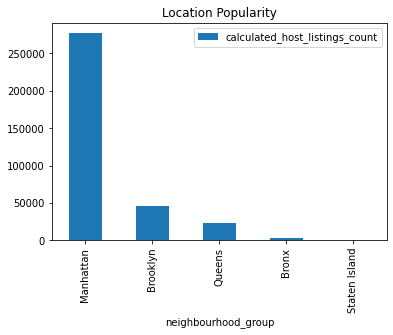

In [24]:
# Chart - 1 visualization code
popular_group.plot(x="neighbourhood_group", y="calculated_host_listings_count", kind="bar" , title = "Location Popularity")

From the above bar graph it's clear that the Manhattan is the most desired borough in NYC among all and it contains the maximum host listings of 277073 in total. Whereas, Staten Island has only 865 host listings which makes the it to the least.

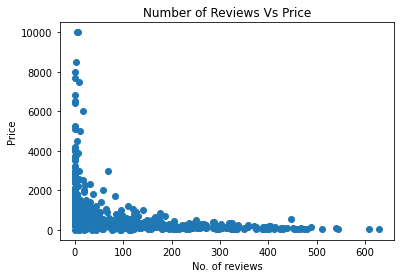

In [25]:
# Chart - 2 visualization code
price = price_area['price']
no_of_reviews = price_area['number_of_reviews']

# creating the bar plot
plt.scatter(no_of_reviews,price)
 
plt.xlabel("No. of reviews")
plt.ylabel("Price")
plt.title("Number of Reviews Vs Price")
plt.show()

We can say this the main focus of the research, as we can clearly see that the maximum revenue is generated from the properties where the price is lower and maximum reviews are on the same.

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

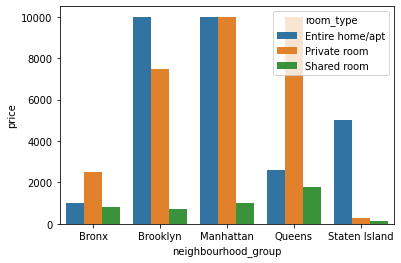

In [26]:
#Chart - 3 visualization code Price w.r.t room_type for all neighbourhood_group
room_price= area_wise_max_cost['price']
sns.barplot(data=area_wise_max_cost, x="neighbourhood_group", y="price", hue="room_type")

For Manhattan, the maximum price of entire apartment and private room the prices are almost similar. And since the Staten Island shared room prices are very low it's neglected. In Queens, private room price is much higher even than the entire home.

<AxesSubplot:xlabel='host_name', ylabel='number_of_reviews'>

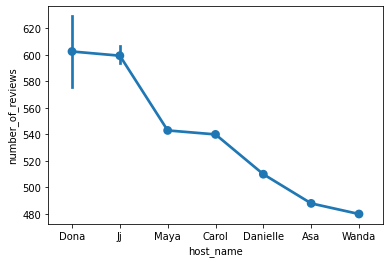

In [27]:
# Chart - 4 visualization code Pointplot for finding the busy hosts from the dataset
sns.pointplot(data=busy_hosts, x="host_name", y="number_of_reviews")

Most busy hosts are Dona, Ji, and Maya.
They have maximum number of reviews on their properties and these listings are private room or entire apartment which are picked by the most people.

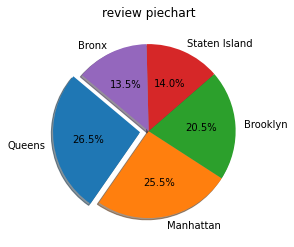

In [28]:
# Chart - 5 visualization code. Piechart for reviews in each neighbourhood_group

neighbour = areas_reviews["neighbourhood_group"]
reviews = areas_reviews["number_of_reviews"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(reviews, labels=neighbour, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("review piechart")
plt.show()

From above pie chart we can see that maximum reviews are from Queens as there are more private listed properties and people generally prefer to stay in private properties.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

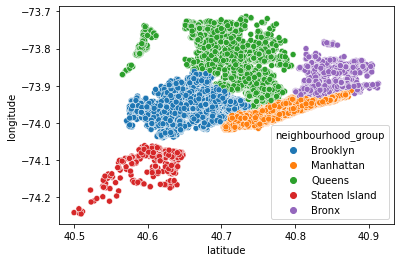

In [124]:
# Chart - 6 visualization code. Scatterplot for neighbourhood_groups using latitude and longitude
sns.scatterplot(data=airbnb_plot, x="latitude", y="longitude", hue="neighbourhood_group")

Scatterplot showing the cluster of 'neighbourhood_group' with the help of latitude and longitude cols. We can clearly see that Manhattan is the highly densed area as it has the maximum number of listings compare to all.

# *Correlation Heatmap*

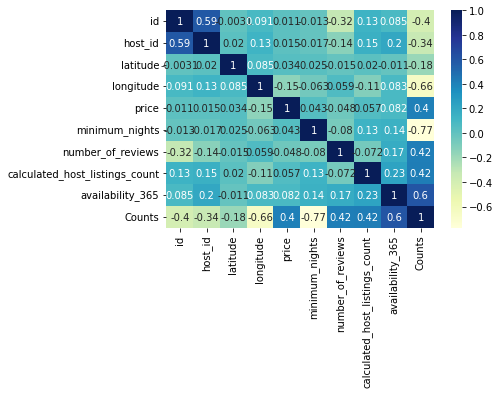

In [126]:
dataplot = sns.heatmap(airbnb_df.corr(), cmap="YlGnBu", annot=True)

# *Pair Plot*

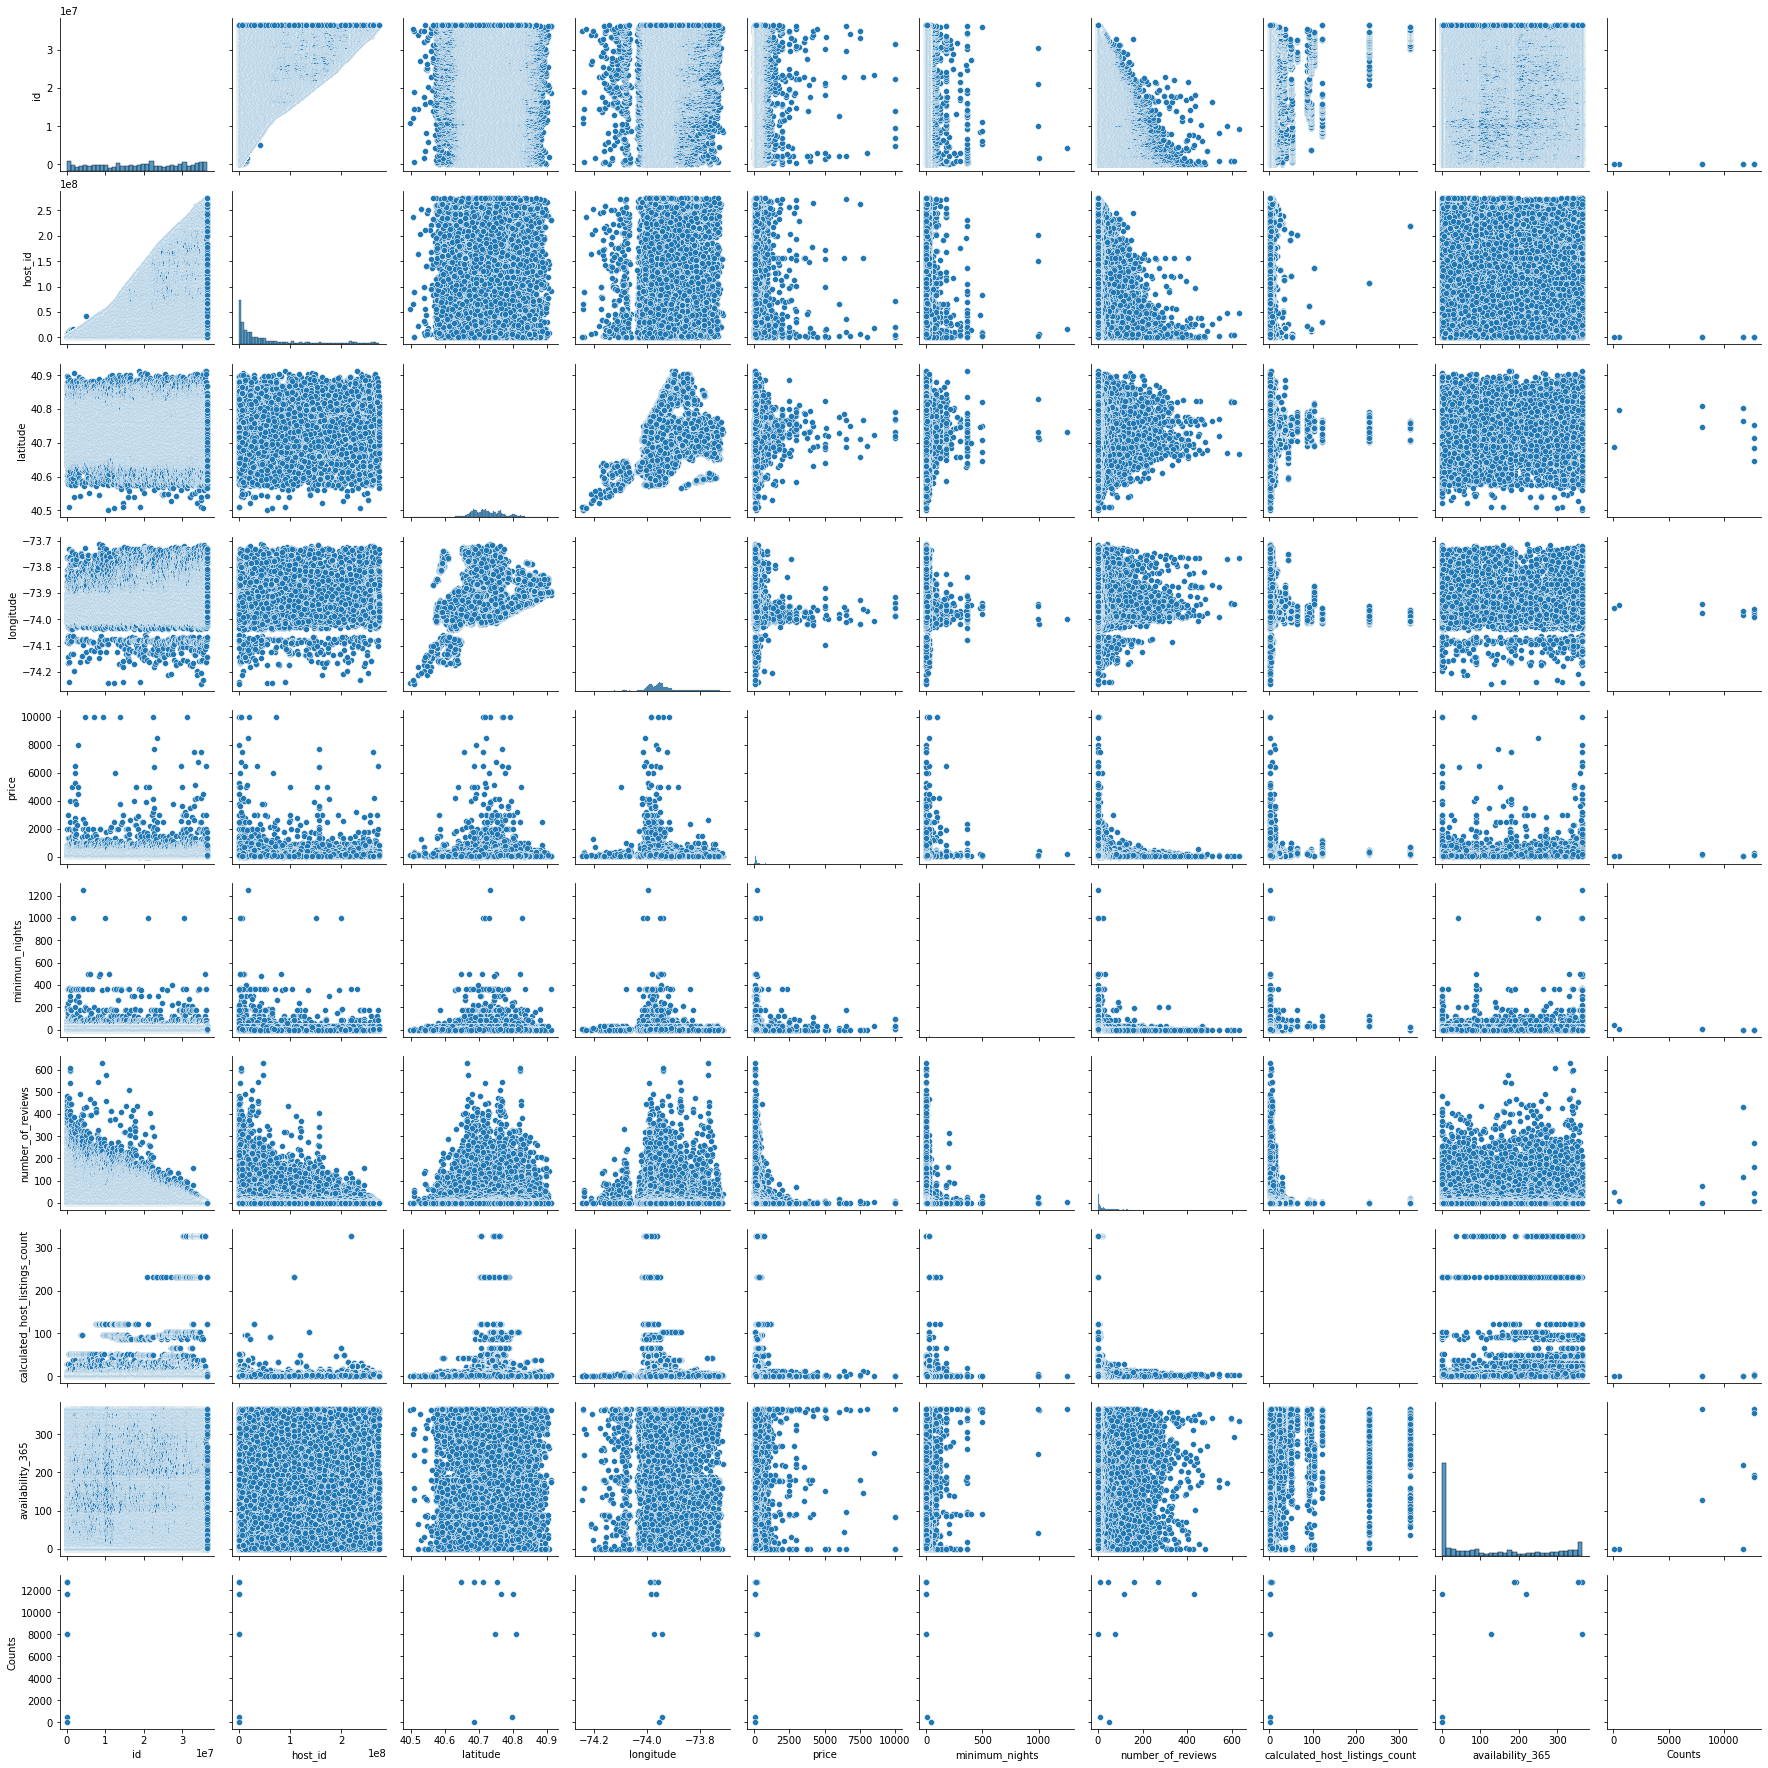

In [127]:
sns.pairplot(airbnb_df)

## **5. Solution to Business Objective**

# **Conclusion**

* People like to stay where prices are low, and prefer private rooms or entire homes compare to shared rooms. 

* More reviews are gained on the places where price are decent and not high. 

* Manhattan and Queens are highly visited by the guests, largest number of reviews are in these boroughs only.
* If entire apartment is booked than it's more likely that guest is going to stay in that neighbourhood for longer.
* Bronx and Staten Island have very less listings and hence there's less business over there compare to other 3 boroughs.

### ***Thank You !!!***